# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [4]:
# cov_NeuN_dict
with open(os.path.join(layer_CalData, 'cov_NeuN_dict.pkl'), 'rb') as f:
    cov_NeuN_dict = pickle.load(f)
f.close()

# cov_NeuN_dict_w
with open(os.path.join(layer_CalData, 'cov_NeuN_dict_w.pkl'), 'rb') as f:
    cov_NeuN_dict_w = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (NeuN)

In [7]:
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Sub-Track Condition

In [9]:
def condition(source, target, name):
    if name == 'canonical':
        # longer_canon
        cond = ((source == 'L23_2(Cingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_2(Cingulate)') |

                (source == 'L23_3d(Paracingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_4(Rectus)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_1(Cingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_3v(Paracingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_3v(Paracingulate)'))

    elif name == 'noncanonical':
        # long_noncanon
        cond = ((source == 'L23_1(Cingulate)') & (target == 'L56_2(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_3v(Paracingulate)') |

                (source == 'L23_1(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_1(Cingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L56_4(Rectus)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_5(Middle Frontal)') | ##
                (source == 'L23_1(Cingulate)') & (target == 'L23_3d(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_3v(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_5(Middle Frontal)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_5(Middle Frontal)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L23_4(Rectus)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L23_5(Middle Frontal)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L23_5(Middle Frontal)') | ##
                (source == 'L56_1(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L56_1(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_3d(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_3v(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_3d(Paracingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_3v(Paracingulate)') & (target == 'L56_5(Middle Frontal)')
                )

    elif name == 'short':
        # short
        cond = ((source == 'L23_1(Cingulate)') & (target == 'L23_2(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_3d(Paracingulate)') |
                (source == 'L23_2(Cingulate)') & (target == 'L23_3v(Paracingulate)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_2(Cingulate)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_3v(Paracingulate)') |
                
                (source == 'L23_1(Cingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L56_2(Cingulate)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_3d(Paracingulate)') | 
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L23_4(Rectus)') & (target == 'L56_4(Rectus)') | 
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_5(Middle Frontal)'))

    else:
        raise ValueError('Condition Not Defined')
    
    return cond

# Draw Graph Networks (NeuN)

## Define Variables

### Set fixed density value 

In [10]:
fd_val = 10

### Label Order

In [15]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [16]:
# Variable setting
neuron_type = "NeuN"
cov_dict = cov_NeuN_dict
data_label = NeuN_Labels

In [17]:
def chordPlot(covMat, data_label, figTitle, fig_type, sub_path = False, sub_path_type = '', ax=None):
    # Substitute NaN values in covMat to 0
    covMat[np.isnan(covMat)] = 0

    # Get upper triangle of covMat
    covMat = np.triu(covMat)

    # Get graph of covMat
    G = nx.Graph(covMat)

    # Creating a mapping from old labels (0-11) to new labels (NeuN_Labels)
    mapping = {old_label: new_label for old_label, new_label in zip(range(12), data_label)}

    # Relabeling the nodes
    G = nx.relabel_nodes(G, mapping)

    # Orderd Positioning the nodes in a circle
    pos = { 'L23_5(Middle Frontal)': np.array([1.00000000e+00, 1.97028653e-08]),
            'L23_4(Rectus)': np.array([0.86602539, 0.50000001]),
            'L23_3v(Paracingulate)': np.array([0.49999998, 0.86602545]),
            'L23_3d(Paracingulate)': np.array([-2.36778241e-08,  1.00000000e+00]),
            'L23_2(Cingulate)': np.array([-0.50000003,  0.86602539]),
            'L23_1(Cingulate)': np.array([-0.86602535,  0.50000007]),
            'L56_1(Cingulate)': np.array([-9.99999960e-01, -6.77199095e-08]),
            'L56_2(Cingulate)': np.array([-0.86602541, -0.49999994]),
            'L56_3d(Paracingulate)': np.array([-0.49999988, -0.86602541]),
            'L56_3v(Paracingulate)': np.array([ 3.19584437e-08, -9.99999960e-01]),
            'L56_4(Rectus)': np.array([ 0.49999992, -0.86602541]),
            'L56_5(Middle Frontal)': np.array([ 0.86602533, -0.50000015])}

    # Define the angle in radians for the clockwise rotation (30 degrees)
    angle = np.radians(15)

    # Perform the rotation for each position
    rotated_pos = {}
    for key, value in pos.items():
        x = value[0]
        y = value[1]
        new_x = x * np.cos(angle) - y * np.sin(angle)
        new_y = x * np.sin(angle) + y * np.cos(angle)
        rotated_pos[key] = np.array([new_x, new_y])

    # Drawing the graph
    fig = plt.figure(figsize=(13, 13))
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    
    if fig_type == 'org':
        # Normalizing edge weights for color mapping
        weights_normalized = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))
        colors = plt.cm.coolwarm(weights_normalized)

        nx.draw_networkx_nodes(G, rotated_pos, node_color='skyblue', node_size=700)
        nx.draw_networkx_labels(G, rotated_pos)
        nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=4*np.abs(weights_normalized))

        plt.title(figTitle)

    elif fig_type == 'cmp':
        # Use the provided ax for plotting instead of creating a new figure
        plt.sca(ax)

        if not sub_path: # Whole
            nx.draw_networkx_nodes(G, rotated_pos, node_color='skyblue', node_size=700)
            nx.draw_networkx_labels(G, rotated_pos)
            nx.draw_networkx_edges(G, rotated_pos, edge_color='red', width=4)

        else: # Subpaths
            # Iterate through each edge to apply conditions
            for u, v, data in G.edges(data=True):
                edge_weight = data['weight']

                # # Define default edge style
                # edge_color = 'black'
                # edge_width = 2

                # Apply condition - Change color and width for edges with weight above a threshold
                if condition(u, v, sub_path_type): # Condition is met
                    # Draw each edge individually
                    nx.draw_networkx_edges(G, rotated_pos, edgelist=[(u, v)], width=4, edge_color='red')

            nx.draw_networkx_nodes(G, rotated_pos, node_color='skyblue', node_size=700)
            nx.draw_networkx_labels(G, rotated_pos)

        ax.set_title(figTitle)
    
    #plt.show()
    return fig


## HC

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_7278/119557302.py:55: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=4*np.abs(weights_normalized))


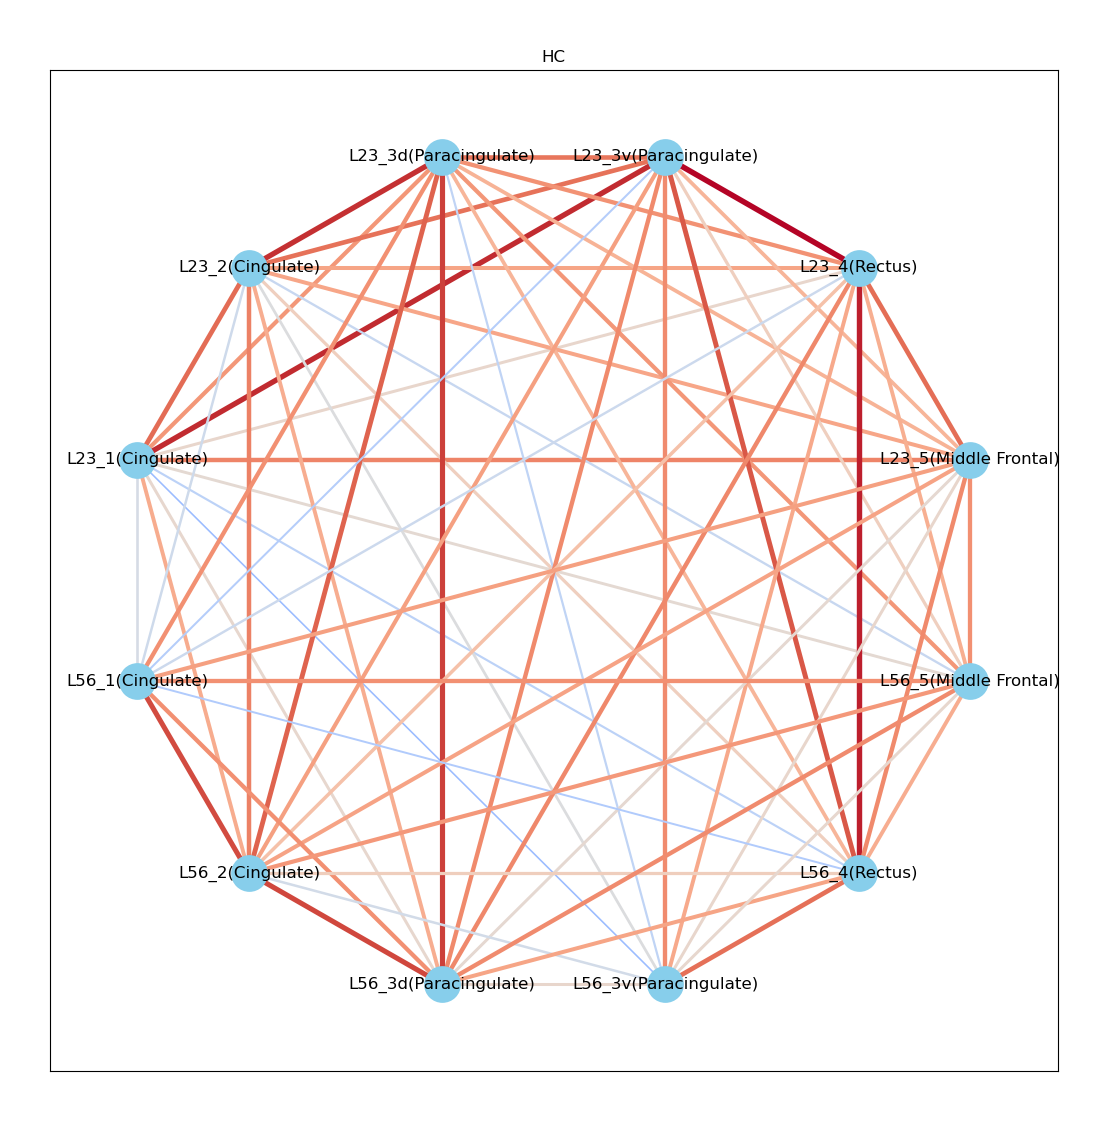

In [14]:
figHC = chordPlot(cov_dict['HC'], data_label, 'HC', fig_type='org')

## TAU

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_7278/119557302.py:55: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=4*np.abs(weights_normalized))


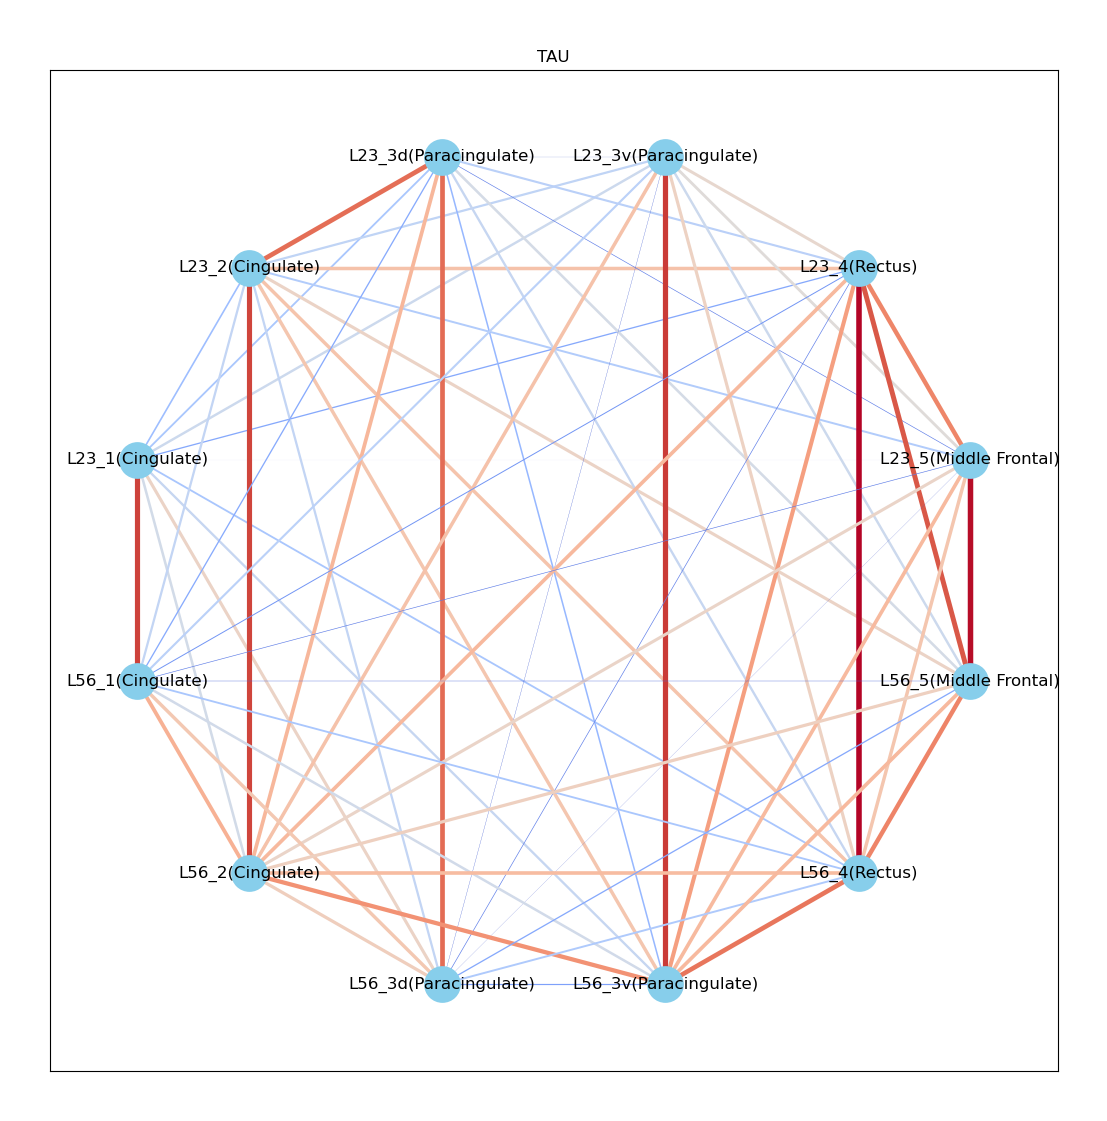

In [18]:
figTAU = chordPlot(cov_dict['TAU'], data_label, 'TAU', fig_type='org')

## TDP

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_7278/119557302.py:55: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=4*np.abs(weights_normalized))


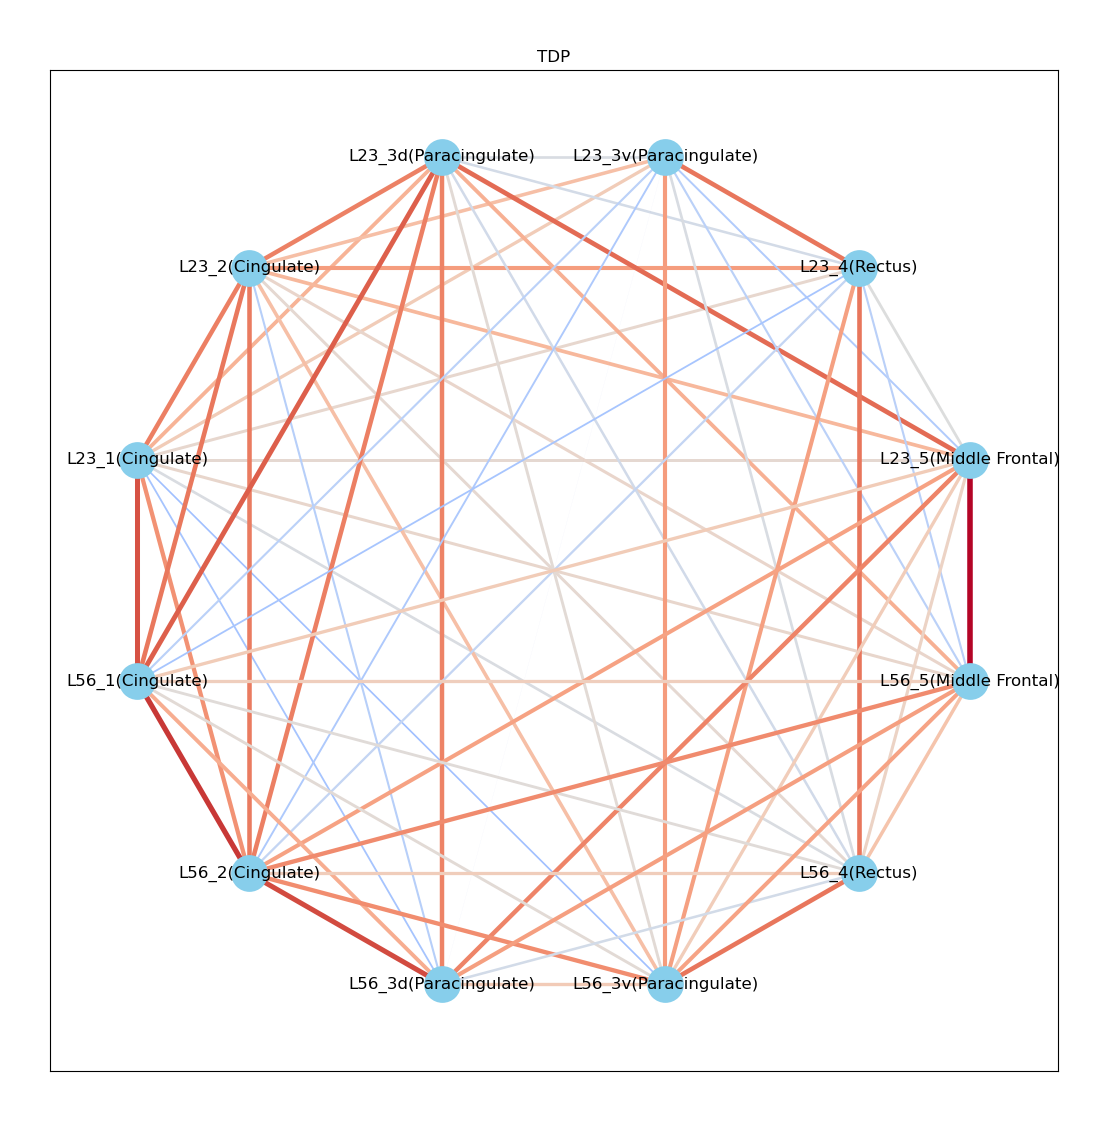

In [19]:
figTDP = chordPlot(cov_dict['TDP'], data_label, 'TDP', fig_type='org')

## HC > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

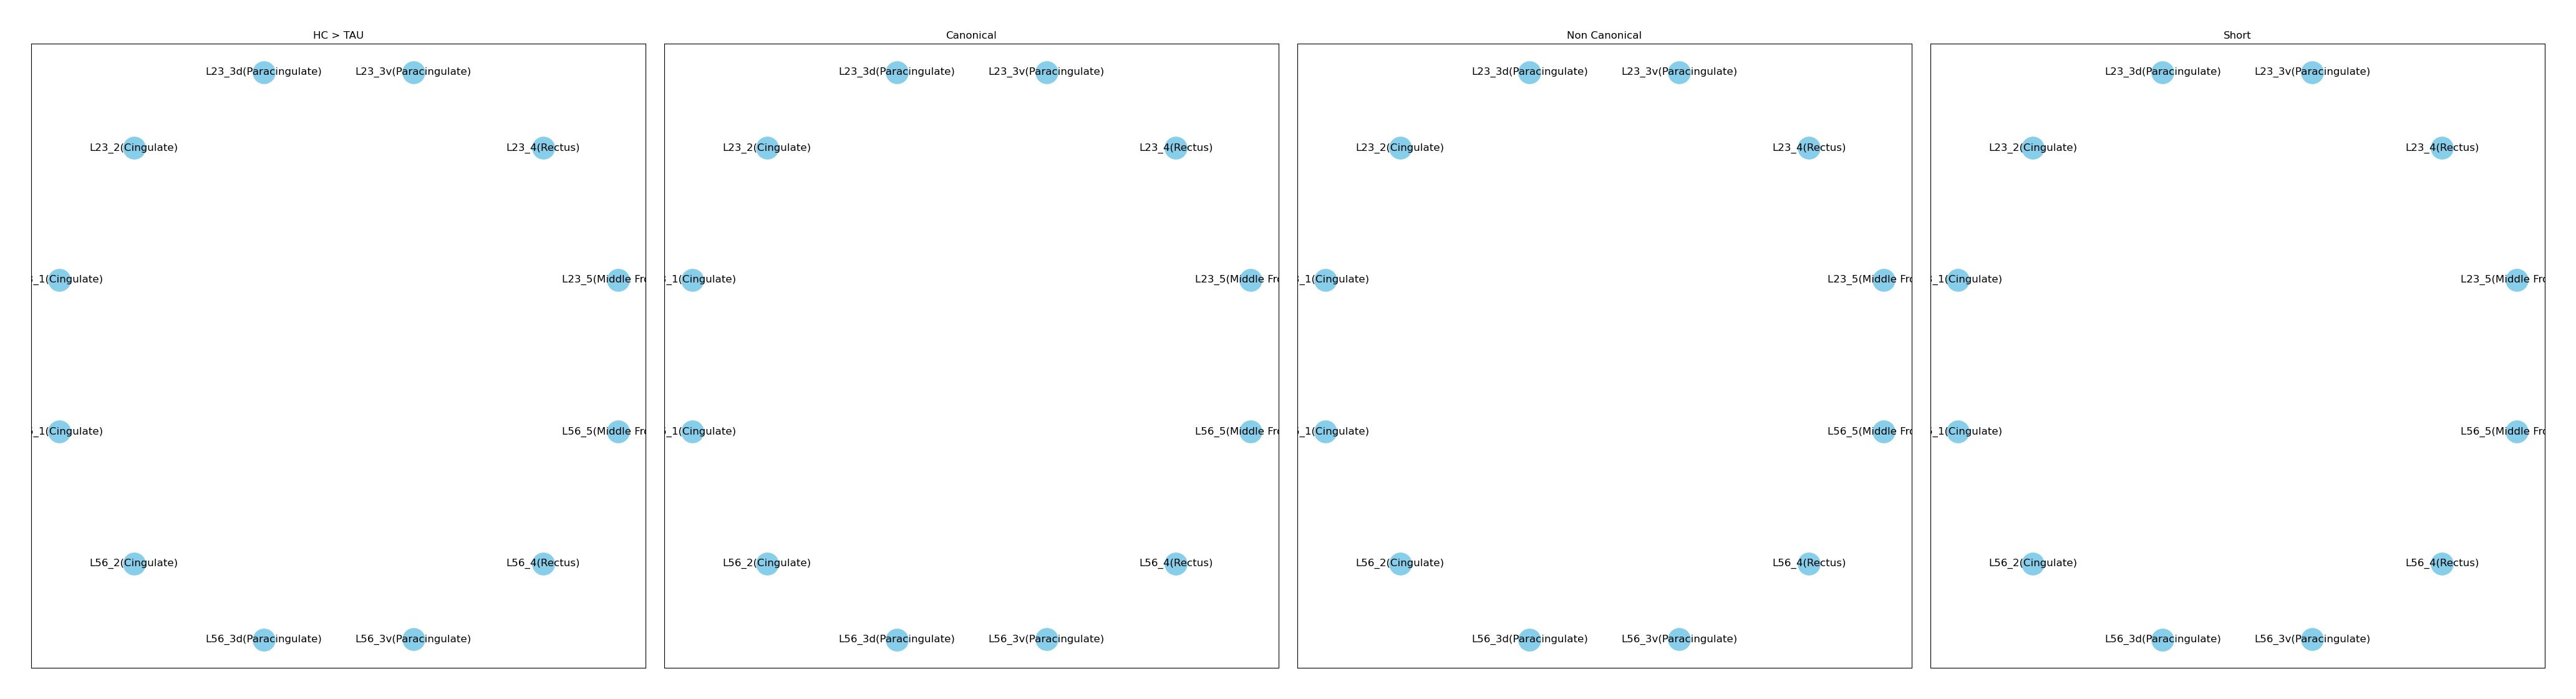

In [27]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_lt_HC'], data_label, 'HC > TAU', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_HC > TAU.png')

# Show or save the final concatenated figure
plt.show()



## TAU > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

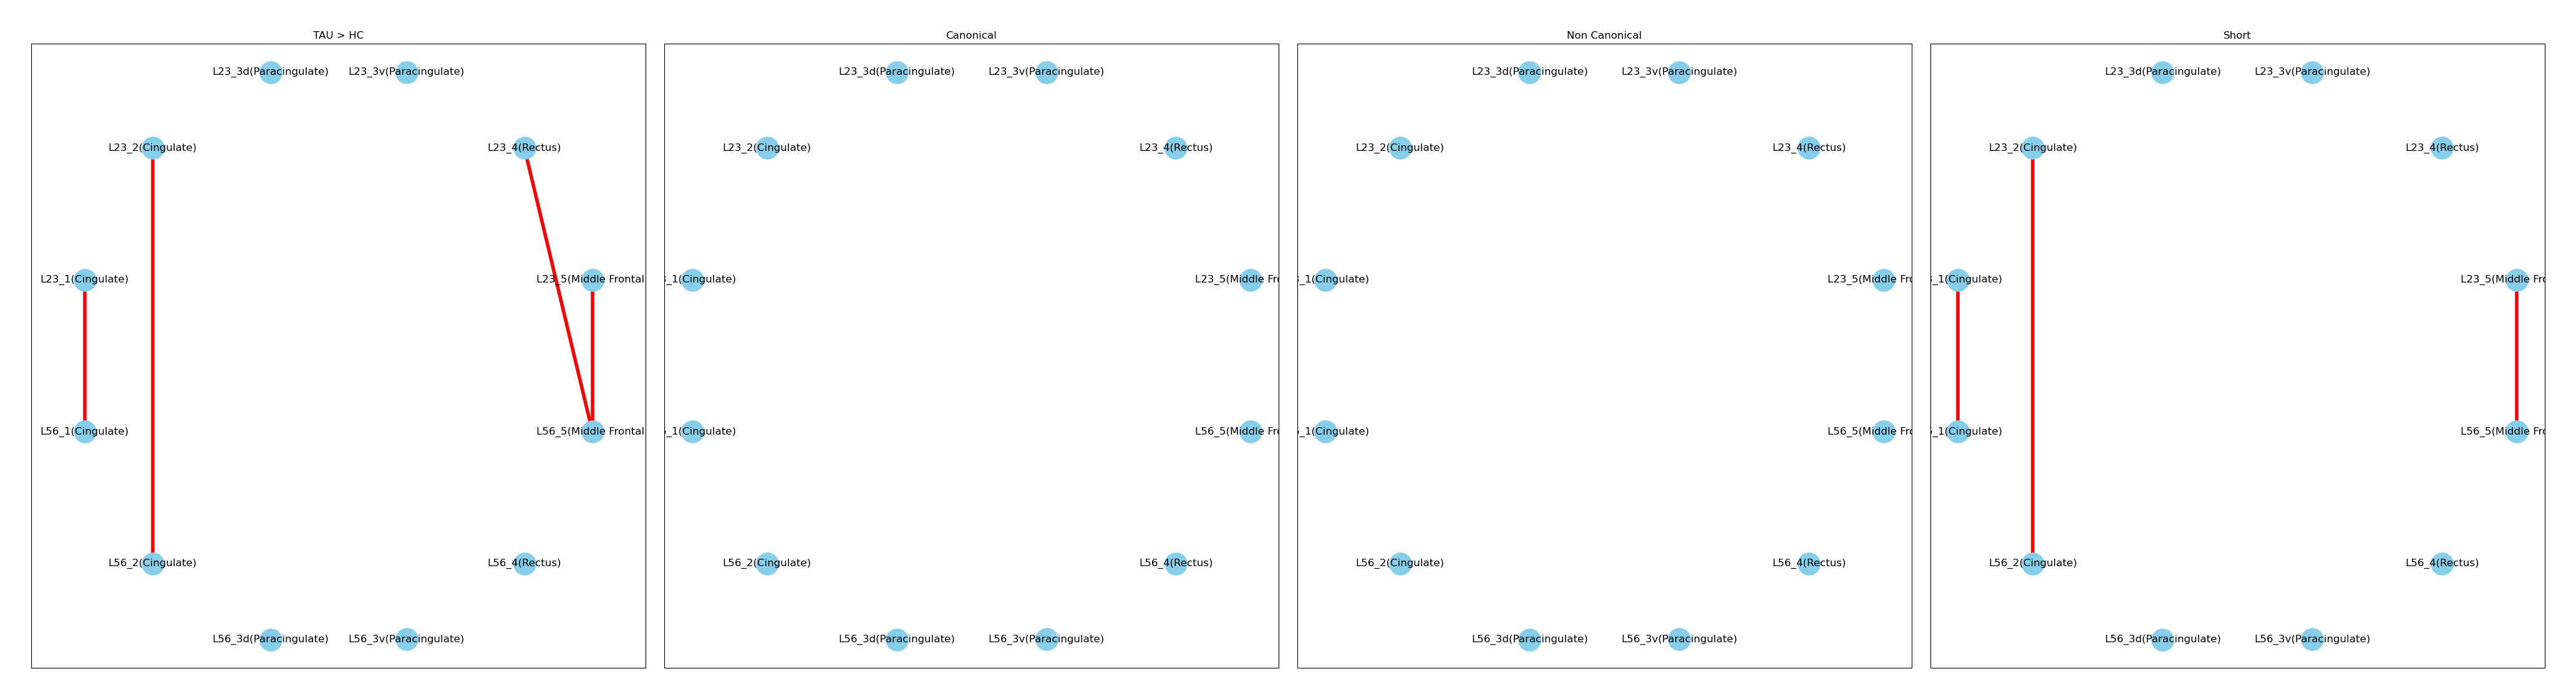

In [21]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_gt_HC'], data_label, 'TAU > HC', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TAU > HC.png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

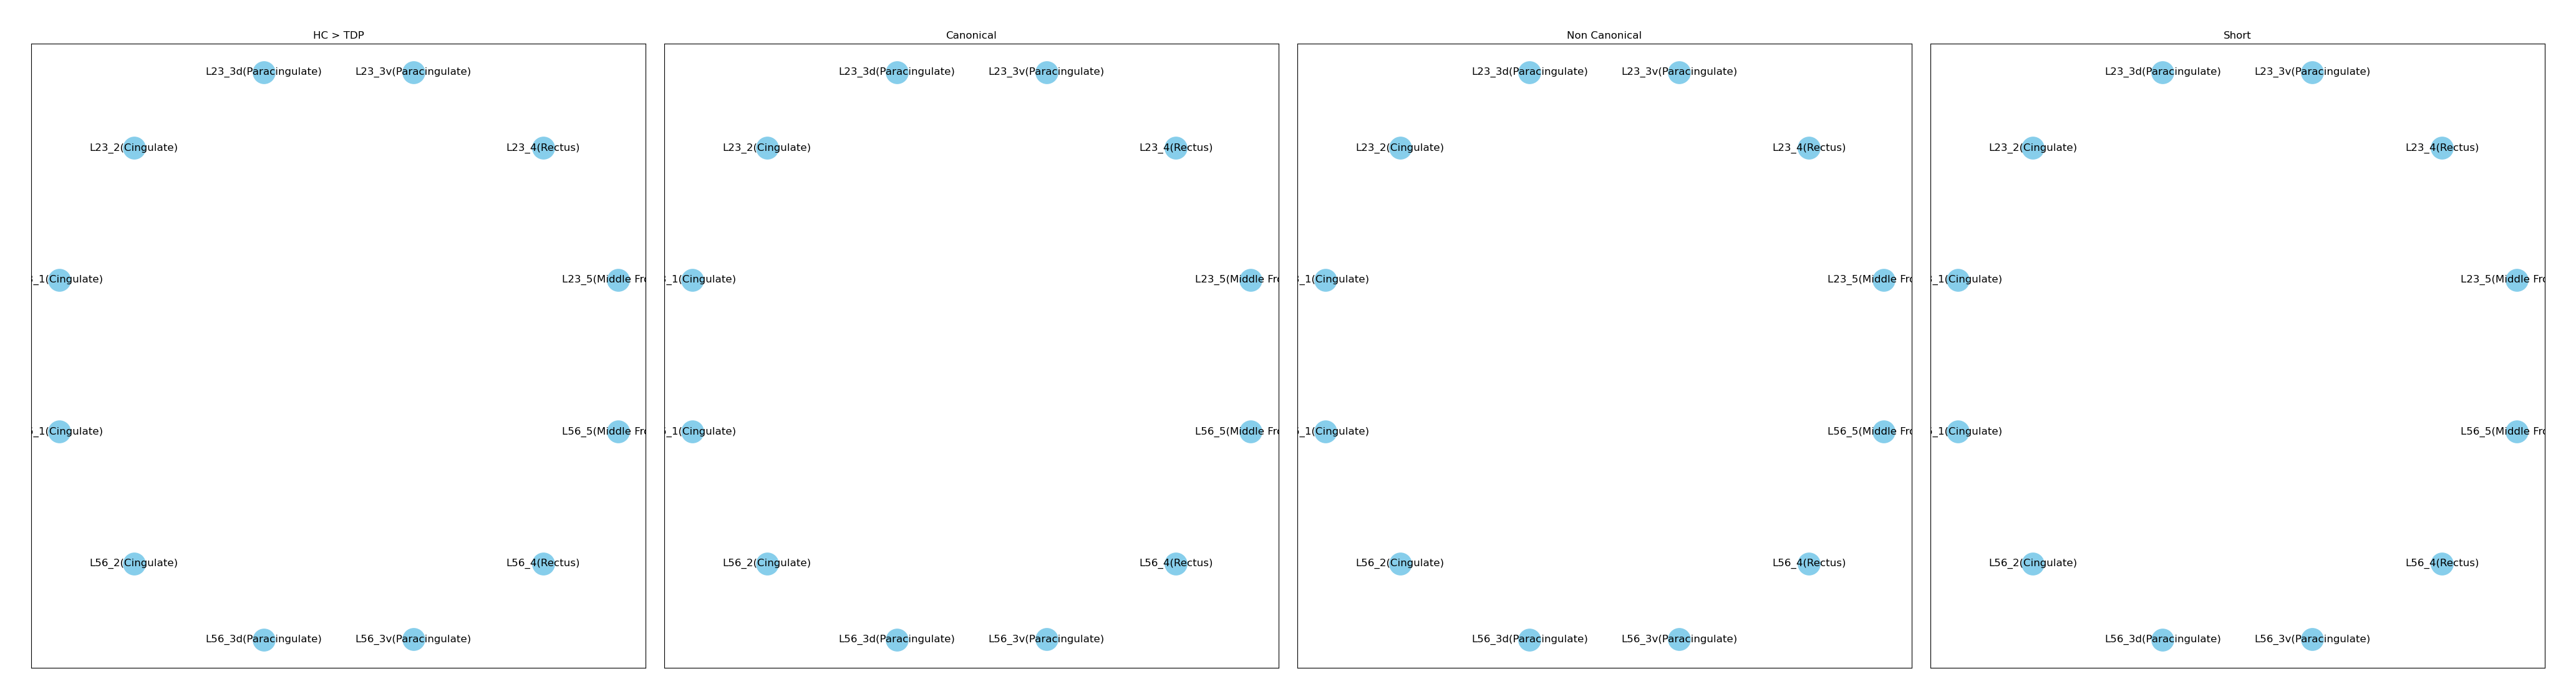

In [23]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_lt_HC'], data_label, 'HC > TDP', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_HC > TDP.png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

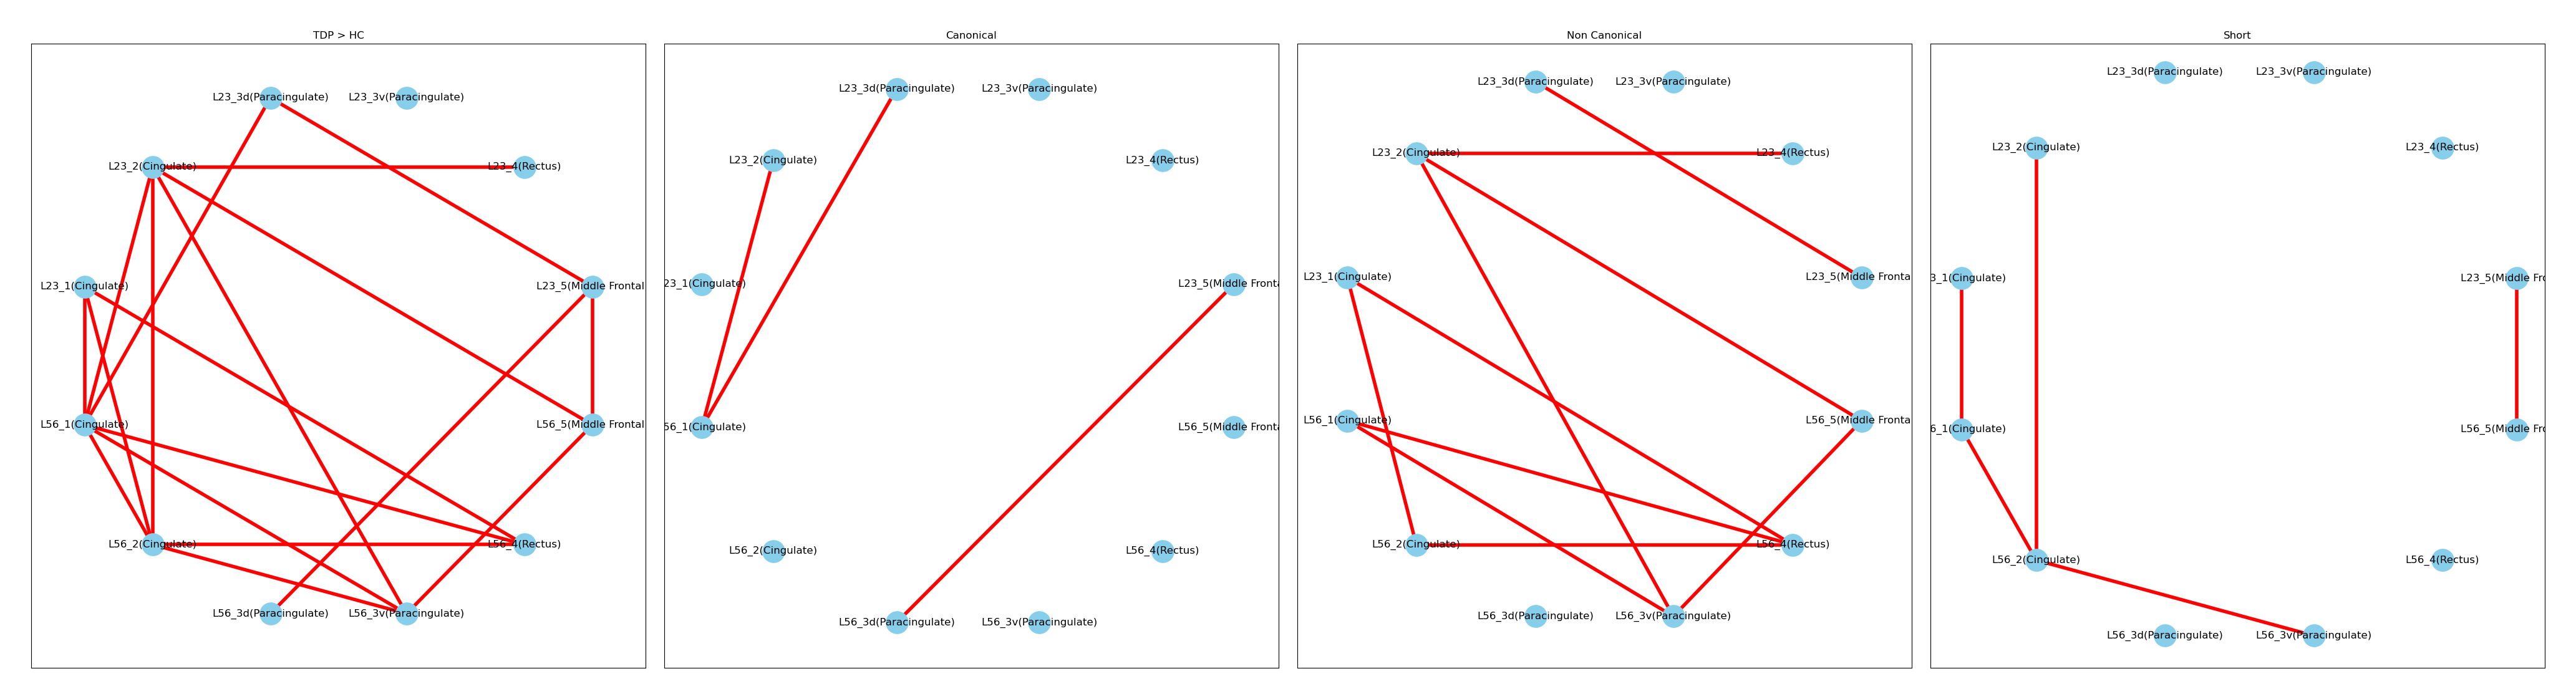

In [24]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_gt_HC'], data_label, 'TDP > HC', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TDP > HC.png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

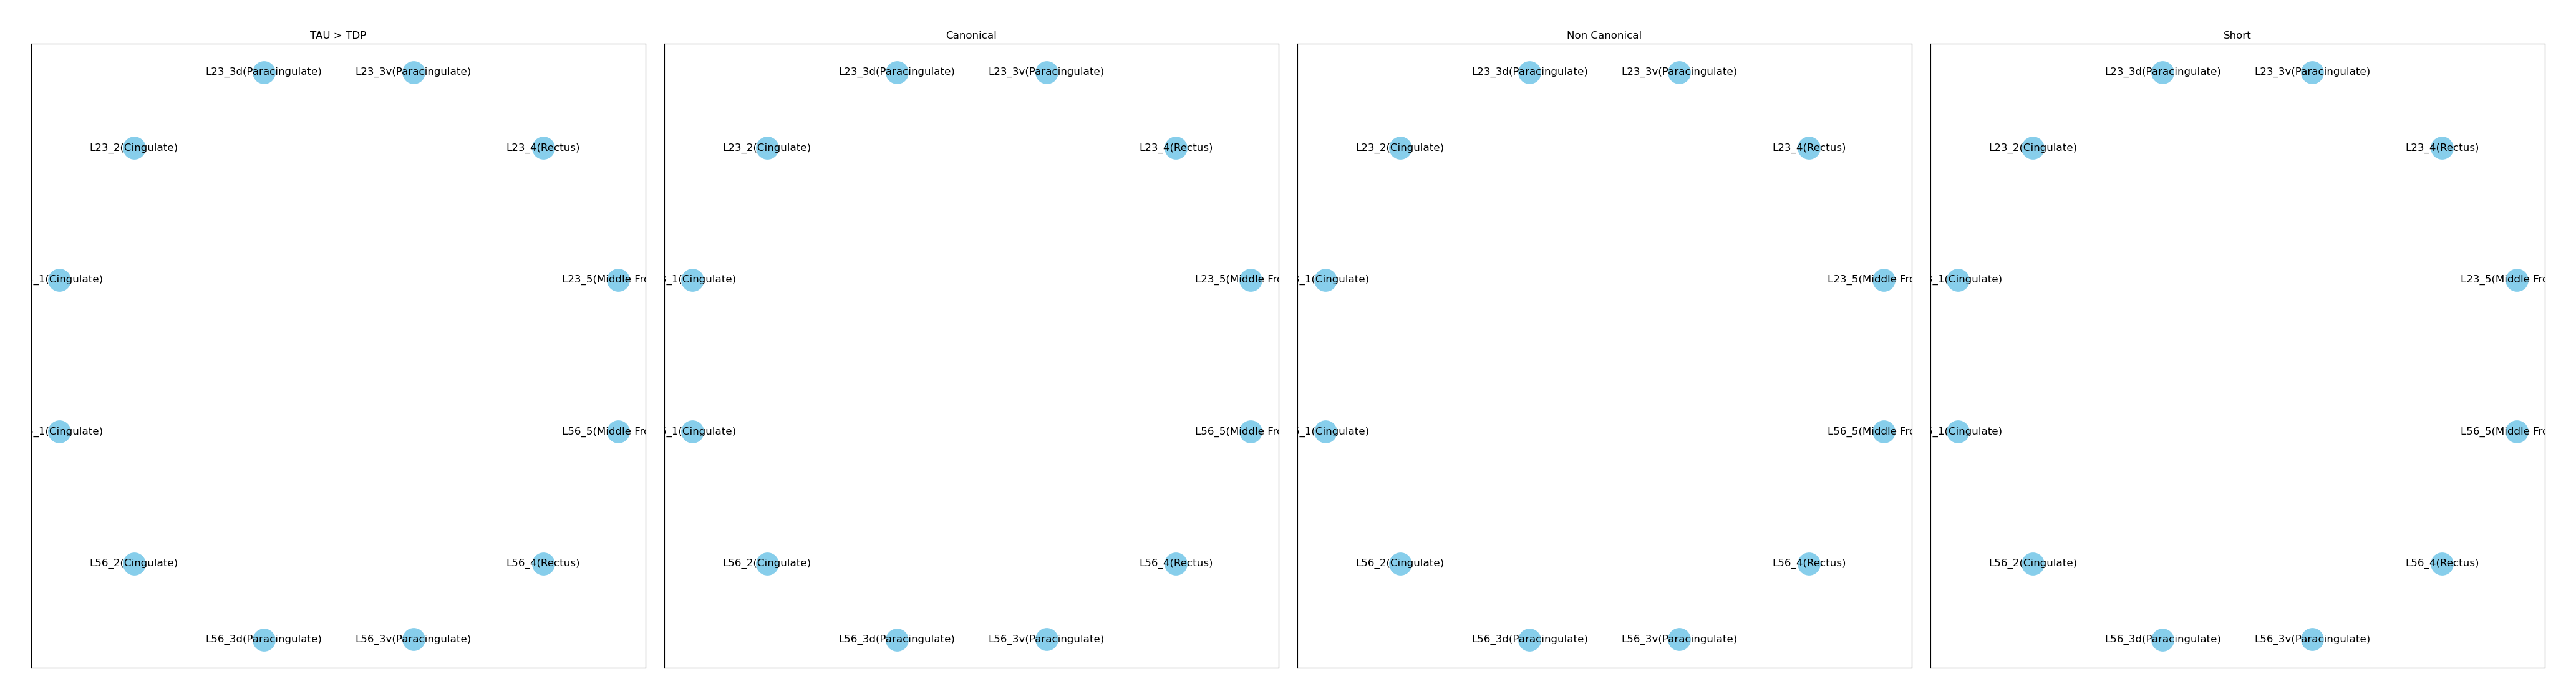

In [25]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'TAU > TDP', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TAU > TDP.png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

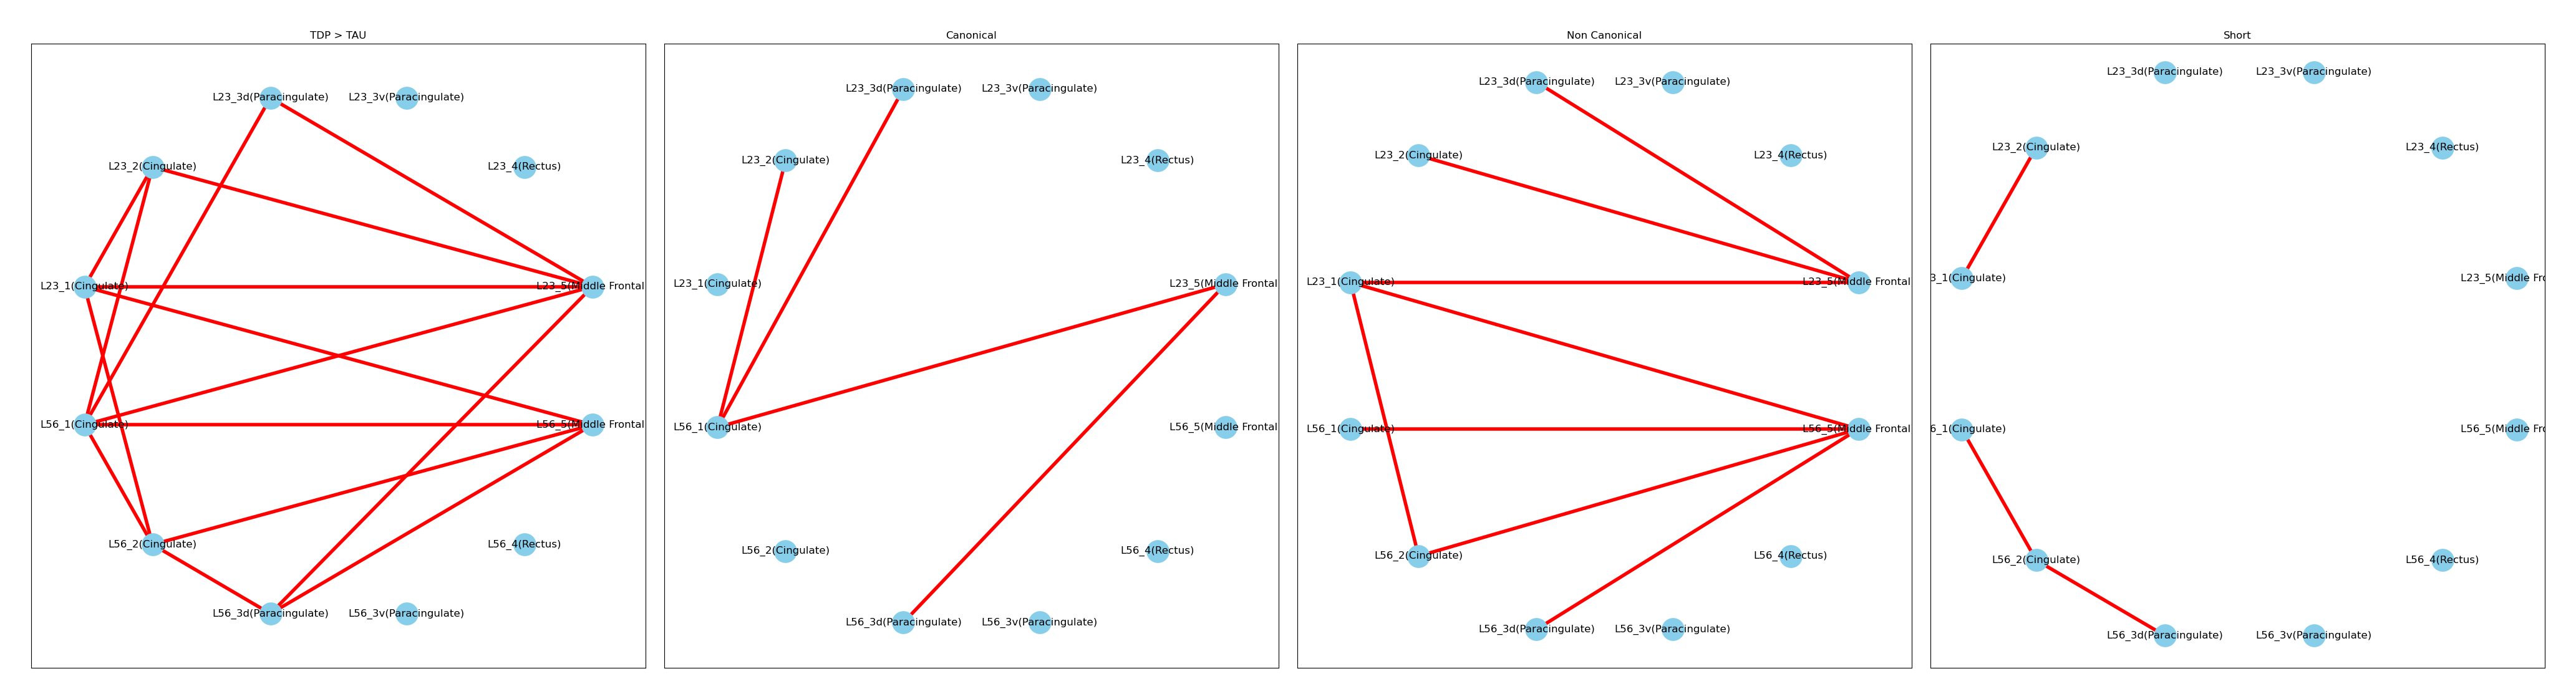

In [26]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'TDP > TAU', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TDP > TAU.png')

# Show or save the final concatenated figure
plt.show()